# Model Interpretability

In this notebook, we are going to understand the model interpretability techniques with the help of credit details dataset. The data set used for this notebook is downloaded from the kaggle.

Dataset link: https://www.kaggle.com/datasets/parisrohan/credit-score-classification

## Target variable is Amount_invested_monthly

## Imports

In [68]:
import warnings
import pandas as pd
from pandas.api.types import is_numeric_dtype
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder as le
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import RobustScaler as rbScaler 
from sklearn.linear_model import LogisticRegression as lgrClassifier
from sklearn import metrics

from statsmodels.stats.outliers_influence import variance_inflation_factor

warnings.filterwarnings('ignore')
%matplotlib inline

In [69]:
df = pd.read_csv('train.csv', low_memory=False)
df.shape

(100000, 29)

In [70]:
df.head()

,Unnamed: 0,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,25268,0xaa0e,CUS_0x8ba4,May,NaN,15,124-32-2706,Engineer,35398.64,3123.886667,...,Standard,1530.57,36.290504,18 Years and 8 Months,Yes,86.561261,224.80764312988399,Low_spent_Medium_value_payments,281.01976219299115,Poor
1,35200,0xe442,CUS_0x8511,January,Stempelu,28,541-42-1348,Developer,43115.38,NaN,...,Good,746.05,35.361119,16 Years and 1 Months,No,118.440209,42.57633717713081,High_spent_Medium_value_payments,469.6782873475251,Good
2,82882,0x1fba4,CUS_0xc07f,March,Jeremyi,18,416-52-9051,Architect,42491.46,3770.955000,...,Standard,1780.79,27.497521,10 Years and 0 Months,Yes,105.413036,73.64169746256437,High_spent_Small_value_payments,458.0407667798933,Standard
3,96200,0x249ae,CUS_0x4844,January,erniet,17,621-93-4258,Musician,59930.64,NaN,...,Bad,2418.61,29.452608,9 Years and 5 Months,Yes,194.142475,102.805425456591,High_spent_Small_value_payments,461.87409987870626,Poor
4,16423,0x7639,CUS_0xa574,August,Stempelr,20,216-81-8709,Doctor,56023.84,4943.653333,...,Bad,3745.69,38.008247,10 Years and 3 Months,NM,296.195961,63.22762135035983,High_spent_Medium_value_payments,384.9417510783197,Poor


In the above dataset, we have credit details of a person such as In_Hand_Salary, Number_Of_Bank_Accounts, credi_Mtix. With the help of all such columns it is possible to predict the amount investment monthly. As mentioned, in this notebook, we will go through model interpretation techniques as well.

## Linear Regression

### Data Cleaning

In [71]:
irrelavent_coulumns = ['ID', 'Customer_ID', 'Month', 'Name', 'SSN']
df.drop(columns=irrelavent_coulumns, inplace=True, axis=1)

In [72]:
df = df.applymap(
    lambda x: x if x is np.NaN or not \
        isinstance(x, str) else str(x).strip('_')).replace(
            ['', 'nan', '!@9#%8', '#F%$D@*&8'], np.NaN
        )

In [73]:
df.Age = df.Age.astype(int)
df.Annual_Income = df.Annual_Income.astype(float)
df.Num_of_Loan = df.Num_of_Loan.astype(int)
df.Num_of_Delayed_Payment = df.Num_of_Delayed_Payment.astype(float)
df.Changed_Credit_Limit = df.Changed_Credit_Limit.astype(float)
df.Outstanding_Debt = df.Outstanding_Debt.astype(float)
df.Amount_invested_monthly = df.Amount_invested_monthly.astype(float)
df.Monthly_Balance = df.Monthly_Balance.astype(float)

Above three steps involves the following tasks

1. We have dropped irrelavent columns for the task that we are working

2. Removed some of the junk characters from the data

3. Tranformed few columns which are indentified as a wrong data types by the pandas

In [ ]:
def take_years(x):  
    if x is not None:
        return str(x).strip()[0:2]

df.Credit_History_Age=df.Credit_History_Age.apply(take_years)
df['Credit_History_Age'] = df['Credit_History_Age'].replace({'na': np.NaN})

Credit history age is in the sentence form in the dataset, with the above code we are going to store only the year value.

In [ ]:
%%capture
def remove_outlier(df):
    low = .05
    high = .95
    quant_df = df.quantile([low, high])
    print(quant_df)
    for name in list(df.columns):
        if is_numeric_dtype(df[name]):
            df = df[(df[name] > quant_df.loc[low, name]) & (df[name] < quant_df.loc[high, name])]
    return df

df = remove_outlier(df)

All the extrment outliers are being removed from the dataset with the above function

In [ ]:
df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].replace({'NM': 'No'})

In [67]:
Occupation_le = le()
Type_of_Loan_le = le()
Credit_Mix_le = le()
Credit_History_Age_le = le()
Payment_of_Min_Amount_le = le()
Payment_Behaviour_le = le()
Credit_Score_le = le()

df['Occupation'] = Occupation_le.fit_transform(df['Occupation'])
df['Type_of_Loan'] = Type_of_Loan_le.fit_transform(df['Type_of_Loan'])
df['Credit_Mix'] = Credit_Mix_le.fit_transform(df['Credit_Mix'])
df['Credit_History_Age'] = Credit_History_Age_le.fit_transform(df['Credit_History_Age'])
df['Payment_of_Min_Amount'] = Payment_of_Min_Amount_le.fit_transform(df['Payment_of_Min_Amount'])
df['Payment_Behaviour'] = Payment_Behaviour_le.fit_transform(df['Payment_Behaviour'])
df['Credit_Score'] = Credit_Score_le.fit_transform(df['Credit_Score'])

In the above code, we are encoding the categorical columns using Label Encoder(LE). LE is one of the techique which can be used to encode the categocrical features to numnerical. LE encodes the features from 0 to n-1 classes where n is number of distinct classes. 

### Correlation heatmap

<AxesSubplot: >

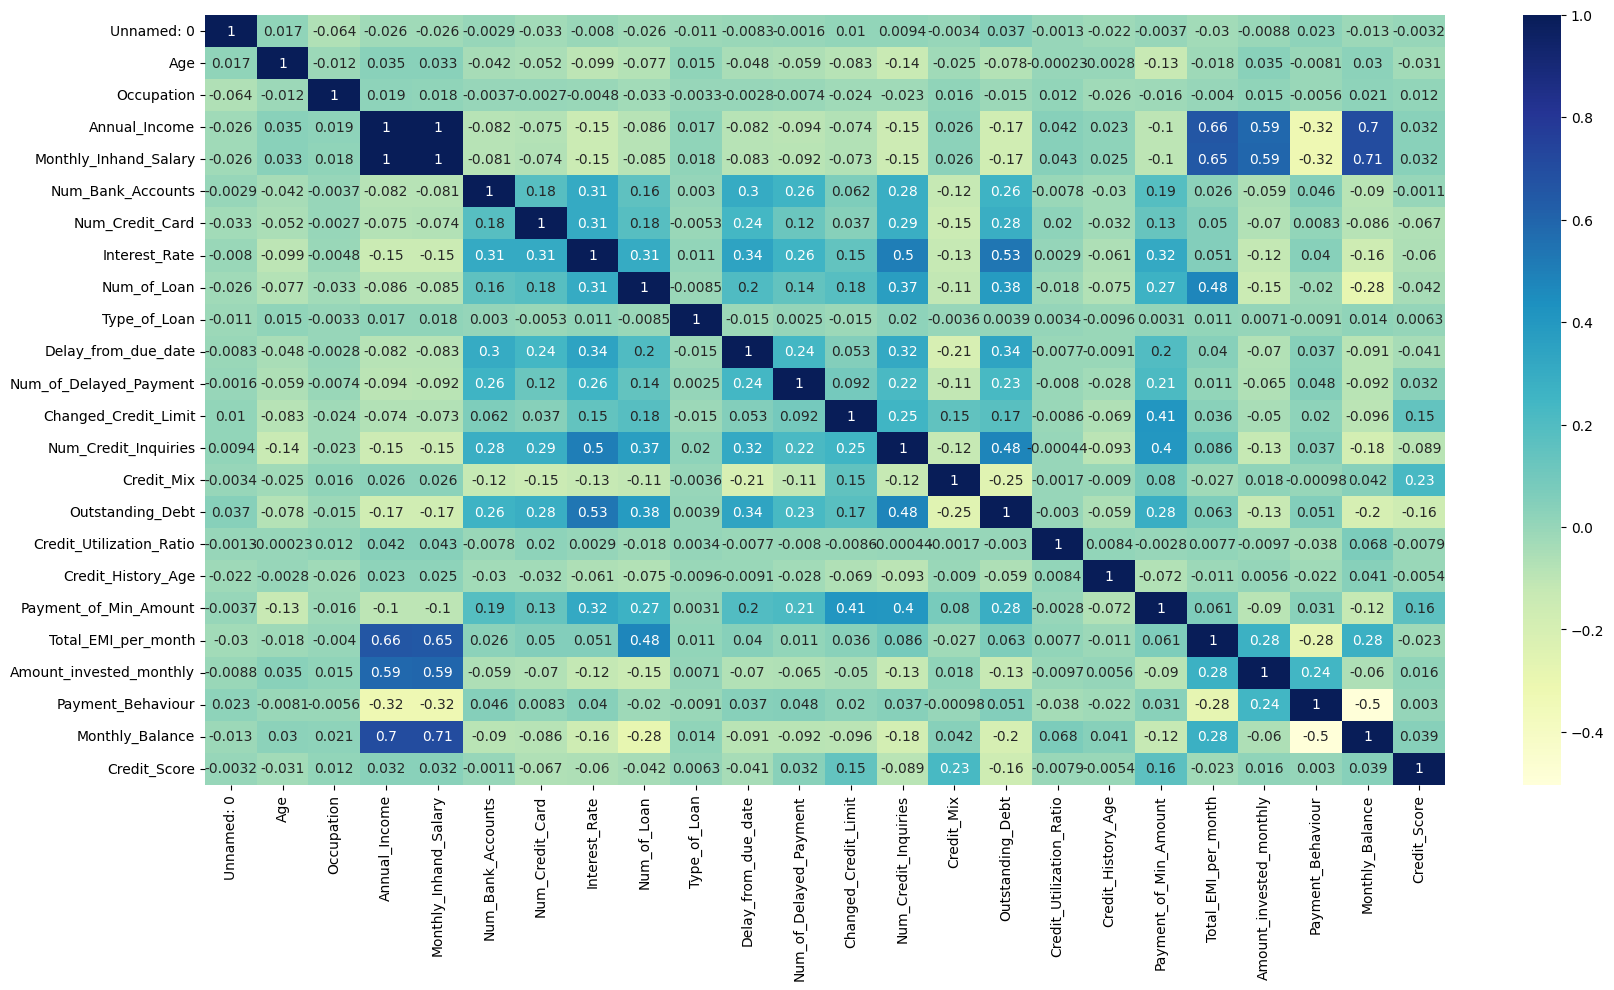

In [14]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr() , annot = True, cmap = "YlGnBu")

The correlation heatmap is basic tool to understand the correlation between all the features in a dataset. It also has an option to display the correlation coefficients which helps to easily summurize the large set of features and understand the patterns.

From the above correlation heatmap, we can clearly see that, our target feature Amount_Invested_Monthly is highly correlated with Annual_Income and Monthly_Inhand_Salary

### Rank Imp features

<AxesSubplot: >

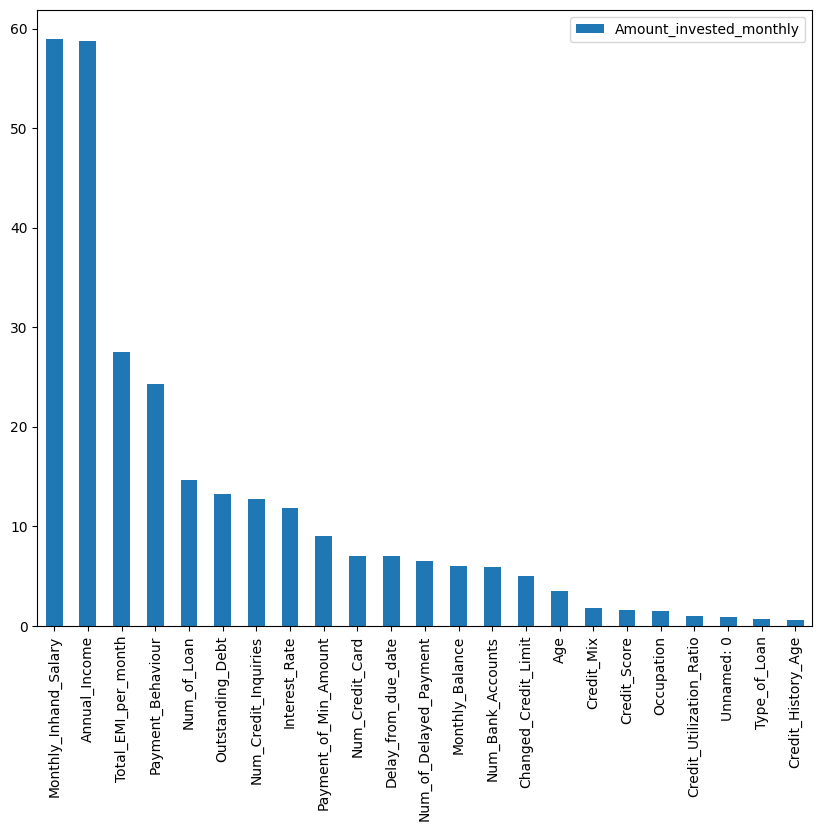

In [15]:
pd.DataFrame(abs(df.corr()['Amount_invested_monthly'].drop('Amount_invested_monthly')*100).sort_values(
    ascending=False)).plot.bar(figsize = (10,8))

### Linear Model fit

In [16]:
X = df.drop(['Amount_invested_monthly'] , axis = 1)
y = df['Amount_invested_monthly' ]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

In [18]:
import statsmodels.api as sm

linear_model = sm.OLS(y_train, X_train).fit()
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     Amount_invested_monthly   R-squared (uncentered):                   0.977
Model:                                 OLS   Adj. R-squared (uncentered):              0.977
Method:                      Least Squares   F-statistic:                          1.941e+04
Date:                     Mon, 05 Dec 2022   Prob (F-statistic):                        0.00
Time:                             20:27:40   Log-Likelihood:                         -51788.
No. Observations:                    10584   AIC:                                  1.036e+05
Df Residuals:                        10561   BIC:                                  1.038e+05
Df Model:                               23                                                  
Covariance Type:                 nonrobust                                                  
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Unnamed: 0                   0.0002    1.2e-05     13.476      0.000       0.000       0.000
Age                          0.7879      0.033     24.189      0.000       0.724       0.852
Occupation                   0.7746      0.068     11.423      0.000       0.642       0.908
Annual_Income                0.0007      0.000      4.758      0.000       0.000       0.001
Monthly_Inhand_Salary        0.0816      0.002     44.965      0.000       0.078       0.085
Num_Bank_Accounts            1.7814      0.187      9.529      0.000       1.415       2.148
Num_Credit_Card              5.1622      0.242     21.322      0.000       4.688       5.637
Interest_Rate                0.0309      0.058      0.535      0.593      -0.082       0.144
Num_of_Loan                 -4.5815      0.271    -16.915      0.000      -5.112      -4.051
Type_of_Loan                 0.0045      0.000      9.008      0.000       0.003       0.005
Delay_from_due_date          0.1073      0.035      3.075      0.002       0.039       0.176
Num_of_Delayed_Payment       1.0967      0.074     14.883      0.000       0.952       1.241
Changed_Credit_Limit         0.6620      0.068      9.717      0.000       0.528       0.796
Num_Credit_Inquiries         0.2308      0.135      1.715      0.086      -0.033       0.495
Credit_Mix                   7.1781      0.411     17.465      0.000       6.372       7.984
Outstanding_Debt             0.0003      0.001      0.589      0.556      -0.001       0.001
Credit_Utilization_Ratio     2.7956      0.059     47.148      0.000       2.679       2.912
Credit_History_Age           0.3529      0.030     11.736      0.000       0.294       0.412
Payment_of_Min_Amount       -5.7934      0.799     -7.250      0.000      -7.360      -4.227
Total_EMI_per_month         -0.6962      0.008    -91.381      0.000      -0.711      -0.681
Payment_Behaviour           12.3122      0.186     66.173      0.000      11.948      12.677
Monthly_Balance             -0.9122      0.004   -254.752      0.000      -0.919      -0.905
Credit_Score                 2.5931      0.494      5.252      0.000       1.625       3.561
==============================================================================
Omnibus:                     4267.943   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            66495.481
Skew:                           1.516   Prob(JB):                         0.00
Kurtosis:                      14.899   Cond. No.                     1.87e+05
==============================================================================

Notes:
[1] R² is computed without ce

**R-squared**: r-squared is the statistic which explains the goodness of a fit. Its values ranges from 0 to 1. In the above model, the r-squared value is 0.97 which means the model has explained the 97 percent of the model variance.

**p-value** is how statistically significant the variable to the model for confidence level of 95 percent. We will compare the p-value with alpha 0.05, in our case p-value of Montly_Inhand_Salary, Occupation etx,. are less than alpha, this implies that all are statistically significant to our model except few columns such as Interest_Rate, Outstanding_Debt.

## Random Forest

In [96]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz

  
 # create regressor object
tree_model = RandomForestRegressor(n_estimators = 5, random_state = 0, max_depth=10)
  
# fit the regressor with x and y data
tree_model.fit(X_train, y_train)  

RandomForestRegressor(max_depth=10, n_estimators=5, random_state=0)

In [91]:
tree_model.score(X_test, y_test)

0.9571946181372725

We have used random forest model here to know how well it fits the data, in turn we were able to get the good score from this random forest model which 95 percent.

## Auto ML 

In [98]:
X_train_h2o = X_train.copy(deep=True)
X_train_h2o['Amount_invested_monthly'] = y_train
X_train_h2o.to_csv('X_train_h2o.csv')

In [99]:
X_test_h2o = X_test.copy(deep=True)
X_test_h2o['Amount_invested_monthly'] = y_test
X_test_h2o.to_csv('X_test_h2o.csv')

H2o model works on h2o data frames, So in the above code we are creating the h2o data frame from X_train and X_test pandas data frames respectively.

In [100]:
import h2o
from h2o.automl import H2OAutoML
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,23 hours 25 mins
H2O_cluster_timezone:,America/New_York
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.2
H2O_cluster_version_age:,1 month and 8 days
H2O_cluster_name:,H2O_from_python_nagavenkateshgavini_6w4b4o
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,410.2 Mb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [101]:
%%capture
train = h2o.import_file("train_h20.csv")

In [102]:
train.shape

(10584, 25)

In [103]:
x = train.columns
y = "Amount_invested_monthly"
x.remove(y)

In [51]:
%%capture
aml = H2OAutoML(exclude_algos=["DeepLearning", "StackedEnsemble"], balance_classes=True, seed=1, nfolds=5, max_models=25)
aml.train(x=x, y=y, training_frame=train)

In [52]:
lb = aml.leaderboard
lb

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
GBM_grid_1_AutoML_20_20221205_204028_model_2,12.1241,146.995,8.42187,0.100159,146.995
GBM_1_AutoML_20_20221205_204028,12.5668,157.924,8.59625,0.104607,157.924
GBM_5_AutoML_20_20221205_204028,13.4831,181.795,9.26668,0.111178,181.795
GBM_2_AutoML_20_20221205_204028,14.0195,196.546,9.63662,0.115706,196.546
GBM_grid_1_AutoML_20_20221205_204028_model_5,14.1692,200.767,9.75518,0.119374,200.767
GBM_3_AutoML_20_20221205_204028,14.4338,208.333,9.92322,0.119605,208.333
GBM_4_AutoML_20_20221205_204028,15.0962,227.896,10.4406,0.127126,227.896
XGBoost_3_AutoML_20_20221205_204028,16.2947,265.518,11.4032,0.126943,265.518
XGBoost_grid_1_AutoML_20_20221205_204028_model_3,16.7487,280.519,11.3739,0.129078,280.519
XGBoost_grid_1_AutoML_20_20221205_204028_model_9,16.9981,288.934,11.9187,0.131734,288.934


From the above leaderboard, we can clearly see that the best model is `GBM_grid_1_AutoML_20_20221205_204028_model_2` 

# Model interpreation

We are going to perform the model interpretation with the help of `shap` python module

In [29]:
import shap
shap.initjs()

## Local interpretability

Local interpretability is interpreation of individual prediction.

### Force Plot Analysis

Force plot helps to visualize how features contribute the individual predictions, lets check the force plot for the row index 5, i.e, 5th row in the X_test.

#### Linear Model Analysis

In [107]:
linear_shap_explainer = shap.Explainer(linear_model.predict, X_test)
linear_model_shap_values = linear_shap_explainer(X_test)

Permutation explainer: 1178it [00:52, 18.09it/s]                                                                                    


In [109]:
shap.plots.force(linear_model_shap_values[5])

In this case, feature **"Monthly_inhand_salary"**, **"Credit_Utilization_Ratio"** and **"Annual_Income"** have a positive impact on the prediction, while **"Monthly_Balance"**, **"Total_EMI_per_month"** have a negative impact on the prediction.

#### Tree Model Analysis

In [35]:
row = X_test.iloc[[5]]
tree_shap_explainer = shap.TreeExplainer(tree_model)
tree_shap_values_row = tree_shap_explainer.shap_values(row)
tree_shap_values = tree_shap_explainer.shap_values(X_test)

In [36]:
shap.force_plot(base_value=tree_shap_explainer.expected_value,
               shap_values=tree_shap_values_row,
               features=row)

In this case, feature **"Monthly_inhand_salary"**, **"Credit_Utilization_Ratio"** and **"Annual_Income"** have a positive impact on the prediction, while **"Monthly_Balance"**, **"Total_EMI_per_month"** have a negative impact on the prediction. Comparattively, both tree based model and linear model performed similar for the row index 5.

#### Auto ML best model

h2o doesn't have a feature to plot the force plot, instead we are going to use the row plot which contains same summary that we see in force plot.

In [54]:
#automl_model = aml.leader
automl_model = h2o.get_model('GBM_grid_1_AutoML_20_20221205_204028_model_2')

In [55]:
%%capture
X_test_for_h20 = h2o.import_file('X_test_h2o.csv')

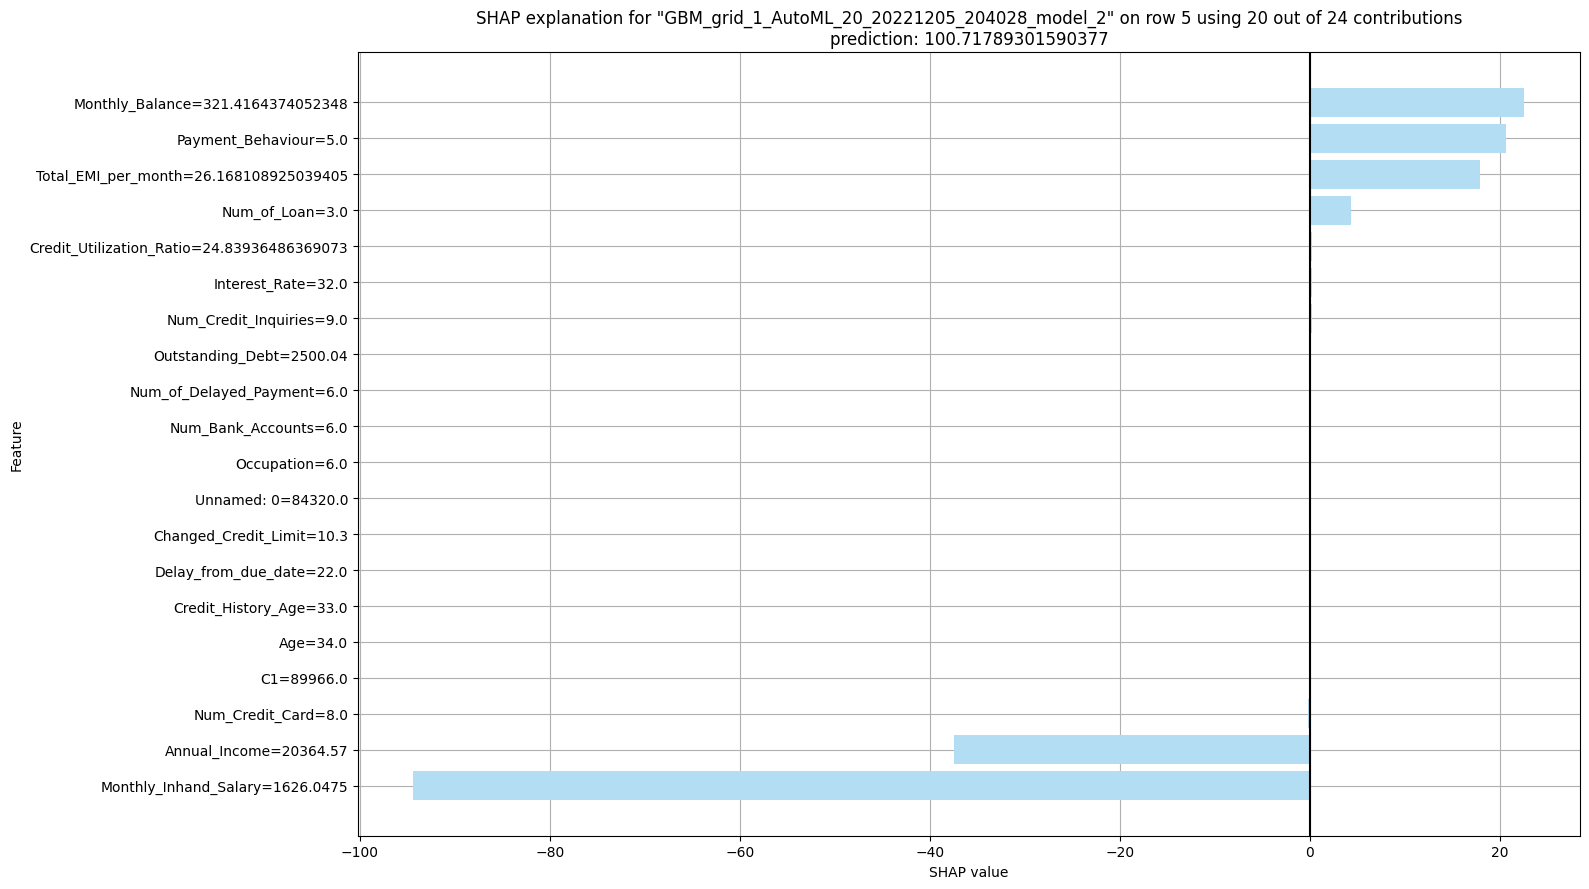

In [56]:
automl_model.shap_explain_row_plot(X_test_for_h20, row_index=5)

In this case, the features like Monthly_Inhand_salary, Annual_Income, Monthly_balance along with total emi and payment behaviour has shown the significant effect on the model predictions

### Global interpretability

Global interpretability helps to interpret the overall model.

#### Variable Importance

Variable Importance helps to understand the important features that contribute the accuracy of a model.

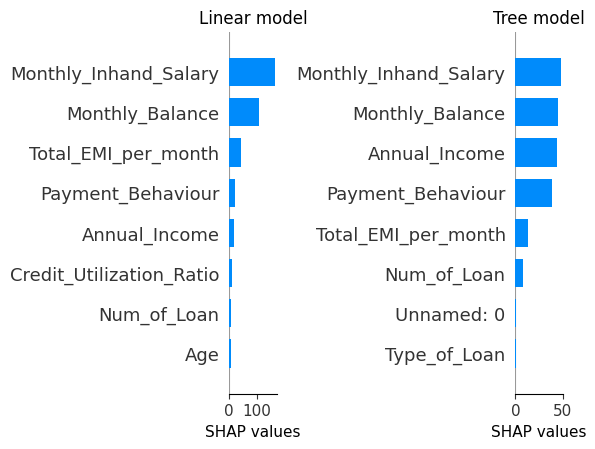

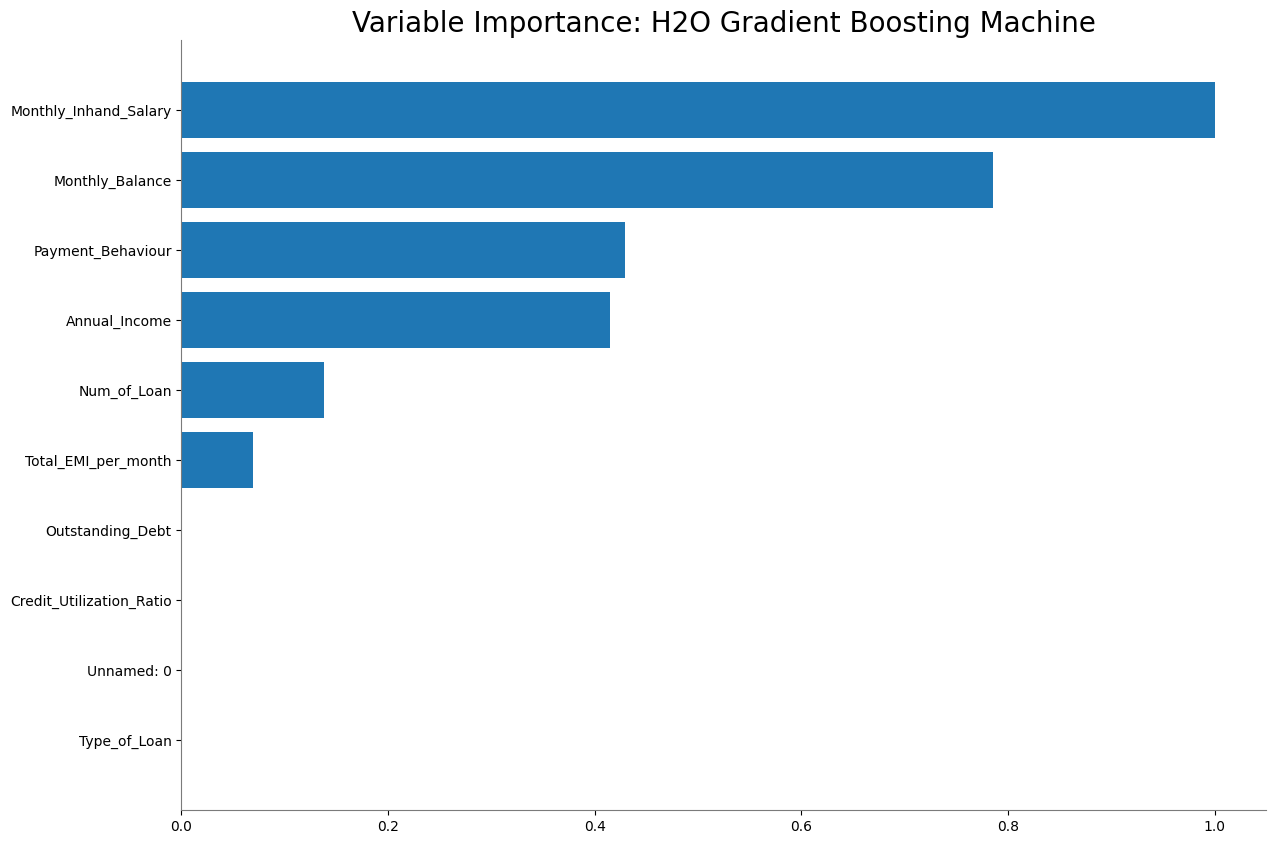

<Figure size 640x480 with 0 Axes>

In [62]:
fig = plt.figure(figsize=(20,10))

ax0 = fig.add_subplot(131)
ax0.title.set_text('Linear model')
shap.summary_plot(linear_model_shap_values, X_test, plot_type="bar", show=False, max_display=8)
ax0.set_xlabel(r'SHAP values', fontsize=11)
plt.subplots_adjust(wspace=5)

ax1 = fig.add_subplot(132)
ax1.title.set_text('Tree model')
shap.summary_plot(tree_shap_values, X_test, plot_type="bar", show=False, max_display=8)
plt.subplots_adjust(wspace = 5)
ax1.set_xlabel(r'SHAP values', fontsize=11)

automl_model.varimp_plot()

plt.show()

From the above three plots, we can clearly see that the Monthly_Inhand_salary is the feature which has contributed the most.

#### Cohort plot

A population can be divided into two or more groups according to a variable. This gives more insights into the heterogeneity of the population. The population can be divided into two cohorts: in those samples, people with in_hand salary less than 4434 dollars, and more than 4434 dollars. In the above sections, we know the variable "montly_inhand_salary" is the most important feature.

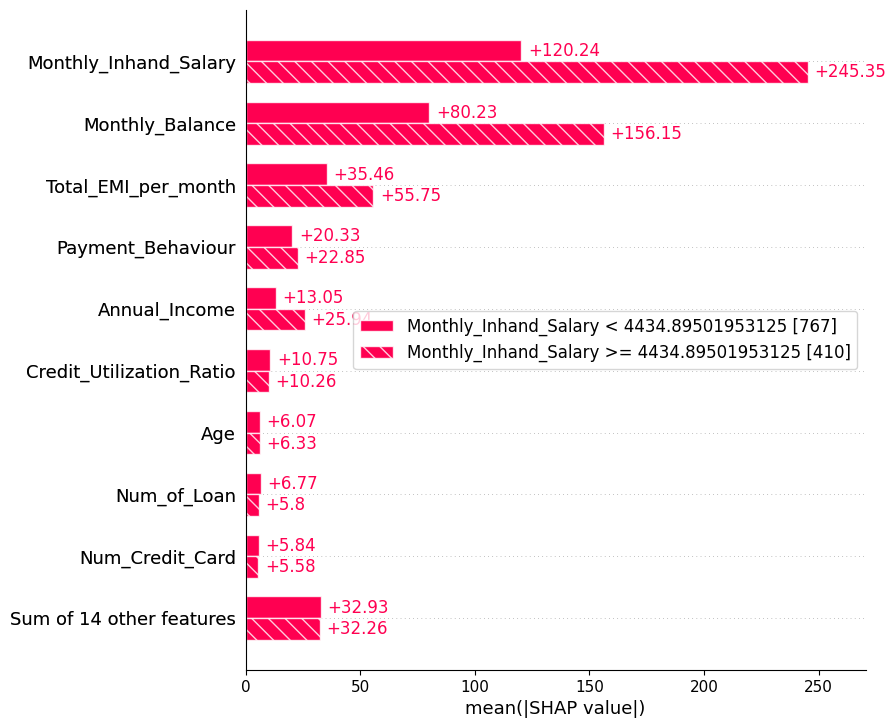

In [40]:
shap.plots.bar(linear_model_shap_values.cohorts(2).abs.mean(0))

The threshold of this optimal division is 4434 dollars. The bar plot tells us that the reason that the sample belongs to the cohort of monthly salary greater that 4434 dollars is because of high savings (SHAP = +245), first cohort can be labeled as the low savings because of its low shap value.

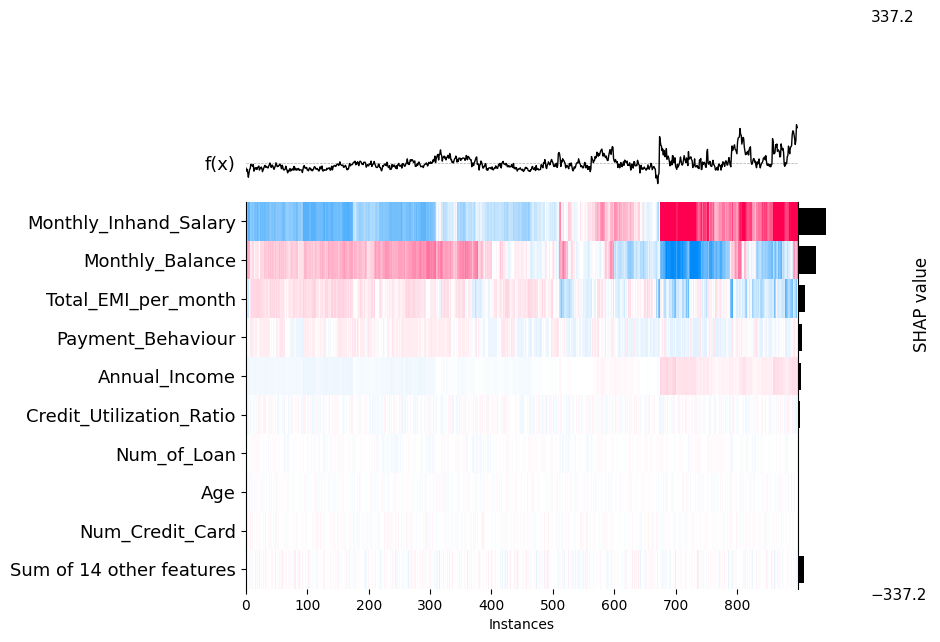

In [41]:
shap.plots.heatmap(linear_model_shap_values[0:1000])

This heatmap is based on samples from 0 to 1000. So the X-axis is the instance from 0 to 100. The colors show the magnitude of the SHAP values. Look at the instance 1000 on the right of the heatmap, it has a red color for Monthly inhand salary, which means "Monthly inhand salary" has contributed the most to the Amount invested.

The f(x) curve on the top of Figure is the model predictions of the instances. Instances around 1000 has a high prediction. It means the  Monthly inhand salary around 1000 is high, and Amount investment is also high.

## References

Refered the following links to understand the functions or the processes that are going to be required during the problem analysis.

1. Scikit-learn Documentation

2. Pandas Official Documentation

3. Analytics Vidya

4. medium: towardsdatascience

5. Seaborn: statistical data visualization

All the visualization code was referred form the seaborn and scikit-learn official documentations. Data frame functions and usage was referred from the Pandas official documentation. All the concepts and doubts in the machine learning cleared with the help of medium(towardsdatascience) and analytics vidya articles. Rest of the code is written individually. pep8 code was followed for all the code snippets.

## Copyright

Copyright 2022 Naga Venkatesh Gavini

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.